<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Lab02_DLLibraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2. Deep Learning libraries

In this lab, you will become familiar with two Deep Learning libraries, TensorFlow and Keras. These libraries are used to create deep learning models with ease and high precision.

TensorFlow was created by Google in 2015 and it specializes in computing gradients for differentiable functions of any dimension using the capabilities of a GPU or TPU if available.

Keras was created in 2015 as well, works on top of TensorFlow by offering an API to easily design deep neural networks in TensorFlow.

1. Create a synthetic dataset with two classes and 1000 points per class.

In [ ]:
# write your code here
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size= num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))


2. Plot the dataset you just created

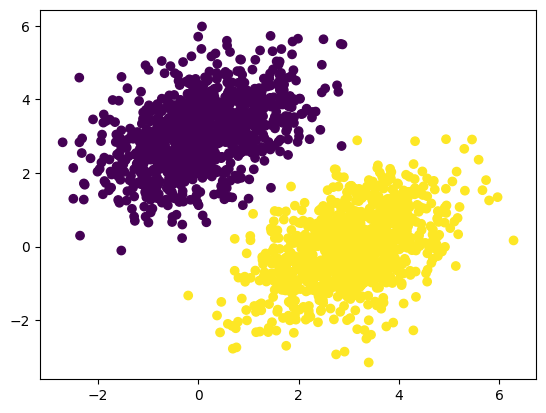

In [ ]:
# write your code here
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

3. Define the models variables W and b using 2D inputs and a single dimension at the output

In [ ]:
# write your code here
import tensorflow as tf

input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

4. Create the feedforward function that computes the operation $prediction=W \cdot inputs + b$

In [ ]:
# write your code here
def model(inputs):
  return tf.matmul(inputs, w) + b

5. Create the loss function by manually computing the Mean Squared Error of the targets against the predicted targets.

In [ ]:
# write your code here
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

6. Create the training function that takes the inputs and targets as arguments and returns the loss.

In [ ]:
# write your code here
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

7. Implement the training loop using 40 epochs

In [ ]:
# write your code here
for step in range(40):
  loss = training_step(inputs, targets)
  print (f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0245
Loss at step 1: 0.0245
Loss at step 2: 0.0245
Loss at step 3: 0.0245
Loss at step 4: 0.0245
Loss at step 5: 0.0245
Loss at step 6: 0.0245
Loss at step 7: 0.0245
Loss at step 8: 0.0245
Loss at step 9: 0.0245
Loss at step 10: 0.0245
Loss at step 11: 0.0245
Loss at step 12: 0.0245
Loss at step 13: 0.0245
Loss at step 14: 0.0245
Loss at step 15: 0.0245
Loss at step 16: 0.0245
Loss at step 17: 0.0245
Loss at step 18: 0.0245
Loss at step 19: 0.0245
Loss at step 20: 0.0245
Loss at step 21: 0.0245
Loss at step 22: 0.0245
Loss at step 23: 0.0245
Loss at step 24: 0.0245
Loss at step 25: 0.0245
Loss at step 26: 0.0245
Loss at step 27: 0.0245
Loss at step 28: 0.0245
Loss at step 29: 0.0245
Loss at step 30: 0.0245
Loss at step 31: 0.0245
Loss at step 32: 0.0245
Loss at step 33: 0.0245
Loss at step 34: 0.0245
Loss at step 35: 0.0245
Loss at step 36: 0.0245
Loss at step 37: 0.0245
Loss at step 38: 0.0245
Loss at step 39: 0.0245


8. Infer targets from the train set and plot the inferred points

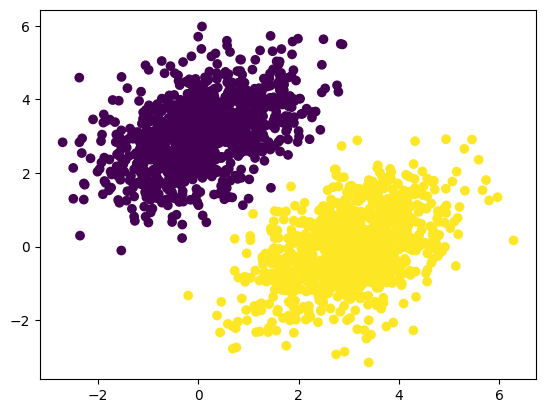

In [ ]:
# write your code here
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

9. Finally, plot the classification line that separates the two classes.

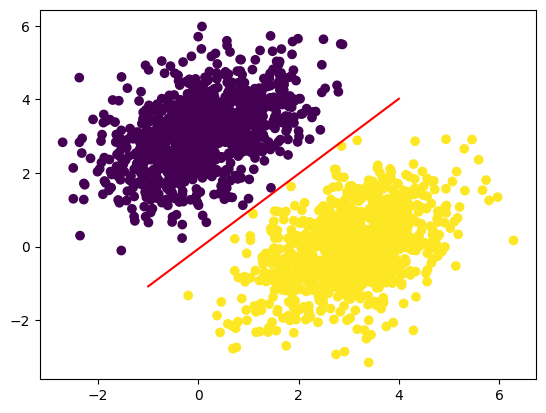

In [ ]:
# write your code here
x = np.linspace(-1, 4, 100)
y = -w[0] / w[1] * x + (0.5 - b) /w[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)